# Naive Bayes Classifier

## Multinomial Bayes Classifier (Spam detection)

In [184]:
!pip install opendatasets

In [185]:
# Importing necessary libraries
import re

import opendatasets as od

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score, log_loss

import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
# Downloading spam data from Kaggle
od.download("https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset")

Skipping, found downloaded files in "./sms-spam-collection-dataset" (use force=True to force download)


In [187]:
# Loading data
spam_data = pd.read_csv("sms-spam-collection-dataset/spam.csv", encoding='latin-1')

# Dropping any NaN values and renaming columns
spam_data.dropna(how="any", inplace=True, axis=1)
spam_data.columns = ['label', 'message']
spam_data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [188]:
# Split data into train and test sets
data_train, data_test, target_train, target_test = train_test_split(
    spam_data.message, spam_data.label, test_size=.2, random_state=42
)
print("Number of training records:", data_train.shape[0])
print("Number of testing records :", data_test.shape[0])

Number of training records: 4457
Number of testing records : 1115


In [189]:
# Vectorizing text data using CountVectorizer
count_vectorizer = CountVectorizer()
processed_data_train = count_vectorizer.fit_transform(data_train)
print("Size of the training data:", processed_data_train.shape)

Size of the training data: (4457, 7735)


In [190]:
# Training Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(processed_data_train, target_train)

MultinomialNB()

In [191]:
# Convert each test message to the bag of words
processed_data_test = count_vectorizer.transform(data_test)

# Getting predictions
test_pred = clf.predict(processed_data_test)

In [192]:
# Printing example predictions
def output_test_message(i):
    il = data_test.index[i]
    print("-"*5)
    print(f"Message {il}:")
    print(re.sub("(.{100}\s)", "\\1\n", data_test[il], 0, re.DOTALL))
    print(f"\ntrue label: {target_test[il]}\npredicted: {test_pred[i]}\n")


output_test_message(0)
output_test_message(3)
output_test_message(42)

-----
Message 3245:
Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches 
hw 2 choose a wife Natural disasters just happens

true label: ham
predicted: ham

-----
Message 2484:
Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me 
know you made it in ok.

true label: ham
predicted: ham

-----
Message 3997:
We tried to call you re your reply to our sms for a video mobile 750 mins UNLIMITED TEXT free camcorder 
Reply or call now 08000930705 Del Thurs

true label: spam
predicted: spam



Accuracy: 0.9839
Log loss: 0.1325
F1 score: 0.9371



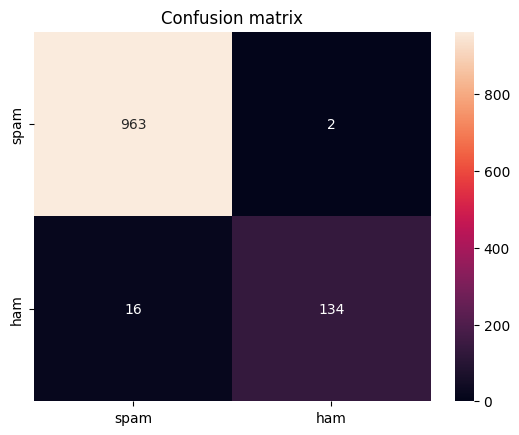

In [193]:
# Printing model evaluation metrics
print(f"Accuracy: {clf.score(processed_data_test, target_test):.4}")
print(f"Log loss: {log_loss(target_test, clf.predict_proba(processed_data_test)):.4}")
print(f"F1 score: {f1_score(target_test == 'spam', test_pred == 'spam'):.4}\n")

# Visualizing confusion matrix
sns.heatmap(confusion_matrix(target_test, test_pred), vmin=0, annot=True, fmt="d",
            xticklabels=["spam", "ham"], yticklabels=["spam", "ham"])
plt.title("Confusion matrix");

## Gaussian Naive Bayes

In [194]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import hamming_loss, confusion_matrix, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

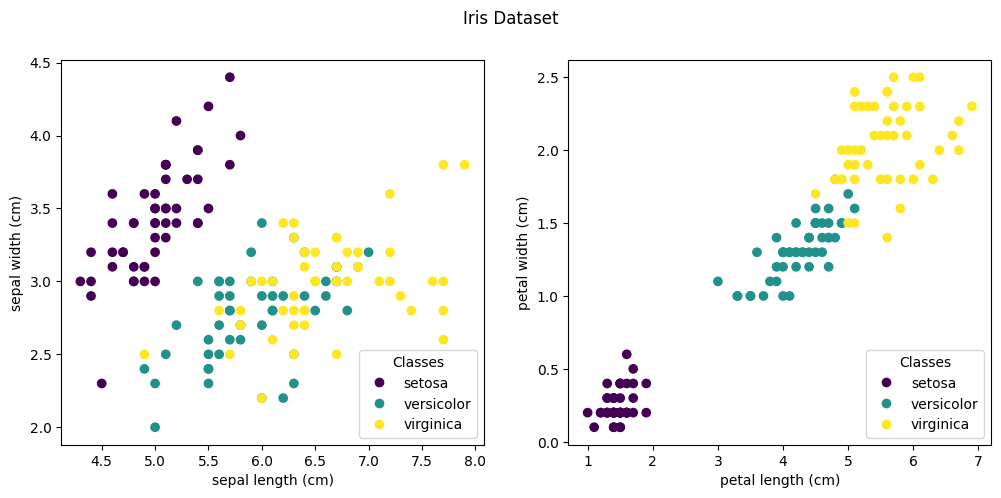

In [195]:
# Load iris dataset
iris = load_iris()

# Plot iris data
_, ax = plt.subplots(1, 2, figsize=(12, 5))
scatter = ax[0].scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax[0].set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax[0].legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
scatter = ax[1].scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax[1].set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax[1].legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
plt.suptitle("Iris Dataset");

In [196]:
# Split data into train and test sets
data_train, data_test, target_train, target_test = train_test_split(iris.data, iris.target, test_size=.4, random_state=42)
print("Number of training records:", data_train.shape[0])
print("Number of testing records :", data_test.shape[0])

Number of training records: 90
Number of testing records : 60


In [197]:


# Training Gaussian Naive Bayes classifier
csf = GaussianNB()
csf.fit(data_train, target_train)

# Getting predictions
test_pred = csf.predict(data_test)

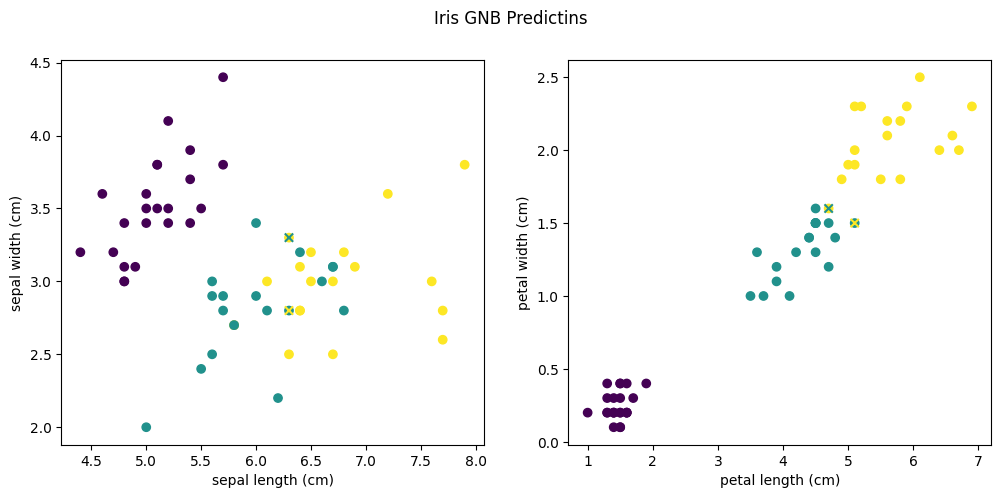

In [198]:
# Plot test iris data prediction vs target
_, ax = plt.subplots(1, 2, figsize=(12, 5))

false_pred_mask = target_test != test_pred

ax[0].scatter(data_test[:, 0], data_test[:, 1], c=test_pred, vmin=0, vmax=2)
ax[0].scatter(data_test[false_pred_mask, 0], data_test[false_pred_mask, 1],
              marker="x", c=target_test[false_pred_mask], vmin=0, vmax=2)
ax[0].set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])

ax[1].scatter(data_test[:, 2], data_test[:, 3], c=test_pred, vmin=0, vmax=2)
ax[1].scatter(data_test[false_pred_mask, 2], data_test[false_pred_mask, 3],
              marker="x", c=target_test[false_pred_mask], vmin=0, vmax=2)
ax[1].set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
plt.suptitle("Iris GNB Predictins");

Subset accuracy: 0.9667
Hamming loss: 0.03333
F1 score: 0.9639



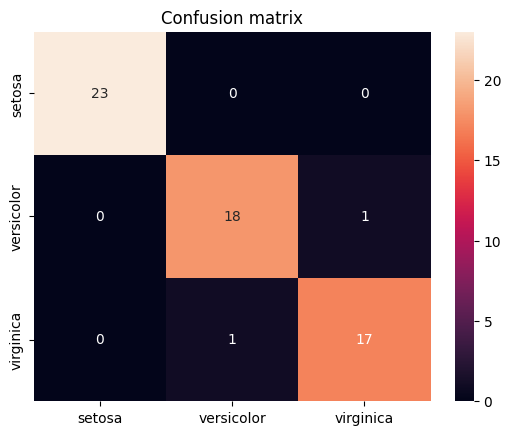

In [199]:
# Printing model evaluation metrics
print(f"Subset accuracy: {csf.score(data_test, target_test):.4}")
print(f"Hamming loss: {hamming_loss(target_test, test_pred):.4}")
print(f"F1 score: {f1_score(target_test, test_pred, average='macro'):.4}\n")

# Visualizing confusion matrix
sns.heatmap(confusion_matrix(target_test, test_pred), vmin=0, annot=True,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion matrix");